# Compare GP Kernels

To create a run, use `pixi run python celeri/scripts/celeri_solve.py /Users/eliot/wna/data/config/wna_config_00001.json --mcmc-seed=42`

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.collections as mc
import matplotlib.pyplot as plt
import numpy as np

import celeri
from celeri.plot import plot_mesh

In [3]:
orig_run_dir = "/Users/eliot/wna/runs/0000000052"
new_run_dir = "/Users/eliot/wna/runs/0000000052"

new_estimation = celeri.Estimation.from_disk(new_run_dir)
new_trace = new_estimation.mcmc_trace

orig_estimation = celeri.Estimation.from_disk(orig_run_dir)
orig_trace = orig_estimation.mcmc_trace

### Original Run

In [ ]:
kind = "ss"
mesh_idx = 0

vmin = -5
vmax = 5

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for ax, draw in zip(axes.flat, range(0, 1000, 100)):
    pc = plot_mesh(
        orig_estimation.model.meshes[mesh_idx],
        fill_value=orig_trace.posterior[f"coupling_{mesh_idx}_{kind}"].isel(
            chain=0, draw=draw
        ),
        ax=ax,
        set_limits=True,
    )

cbar = fig.colorbar(
    pc,
    ax=axes,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle(f"10 posterior draws of {kind} coupling on mesh {mesh_idx}");

### New Run

In [ ]:
kind = "ss"
mesh_idx = 0

vmin = -5
vmax = 5

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for ax, draw in zip(axes.flat, range(0, 1000, 100)):
    pc = plot_mesh(
        new_estimation.model.meshes[mesh_idx],
        fill_value=new_trace.posterior[f"coupling_{mesh_idx}_{kind}"].isel(
            chain=0, draw=draw
        ),
        ax=ax,
        set_limits=True,
    )

cbar = fig.colorbar(
    pc,
    ax=axes,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle(f"10 posterior draws of {kind} coupling on mesh {mesh_idx}");

In [ ]:
mesh_idx = 1
slip_comp = "ds"

fig, axes = plt.subplots(5, 2, figsize=(12, 8))

for ax, draw in zip(axes.flat, range(0, 1000, 100)):
    pc = plot_mesh(
        new_estimation.model.meshes[mesh_idx],
        fill_value=new_trace.posterior[f"elastic_{mesh_idx}_{slip_comp}"].isel(
            chain=0, draw=draw
        ),
        ax=ax,
        set_limits=True,
    )

cbar = plt.colorbar(
    pc,
    ax=ax,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle(f"10 posterior draws of elastic {slip_comp} on mesh {mesh_idx}");

### Top elements

In [ ]:
top_indices = np.where(new_estimation.model.meshes[0].top_elements)
mesh = new_estimation.model.meshes[0]
x_coords = mesh.points[:, 0]
y_coords = mesh.points[:, 1]
vertex_array = np.asarray(mesh.verts)

xy = np.c_[x_coords, y_coords]
verts = xy[vertex_array]

fig, ax = plt.subplots(figsize=(10, 8))

fill_value = np.zeros(len(mesh.verts))
pc = mc.PolyCollection(
    verts,
    edgecolor="none",
    cmap="gray",
    alpha=0.3,
)
pc.set_array(fill_value)
ax.add_collection(pc)

if len(top_indices) > 0:
    bot_verts = verts[top_indices]
    bot_pc = mc.PolyCollection(
        bot_verts,
        edgecolor="black",
        facecolor="yellow",
        linewidth=0.5,
        alpha=0.8,
    )
    ax.add_collection(bot_pc)

x_edge = x_coords[mesh.ordered_edge_nodes[:, 0]]
y_edge = y_coords[mesh.ordered_edge_nodes[:, 0]]
x_edge = np.append(x_edge, x_coords[mesh.ordered_edge_nodes[0, 0]])
y_edge = np.append(y_edge, y_coords[mesh.ordered_edge_nodes[0, 0]])
ax.plot(x_edge, y_edge, color="black", linewidth=1)

ax.set_aspect("equal")
ax.autoscale()
plt.title("Top TDEs")
plt.show()

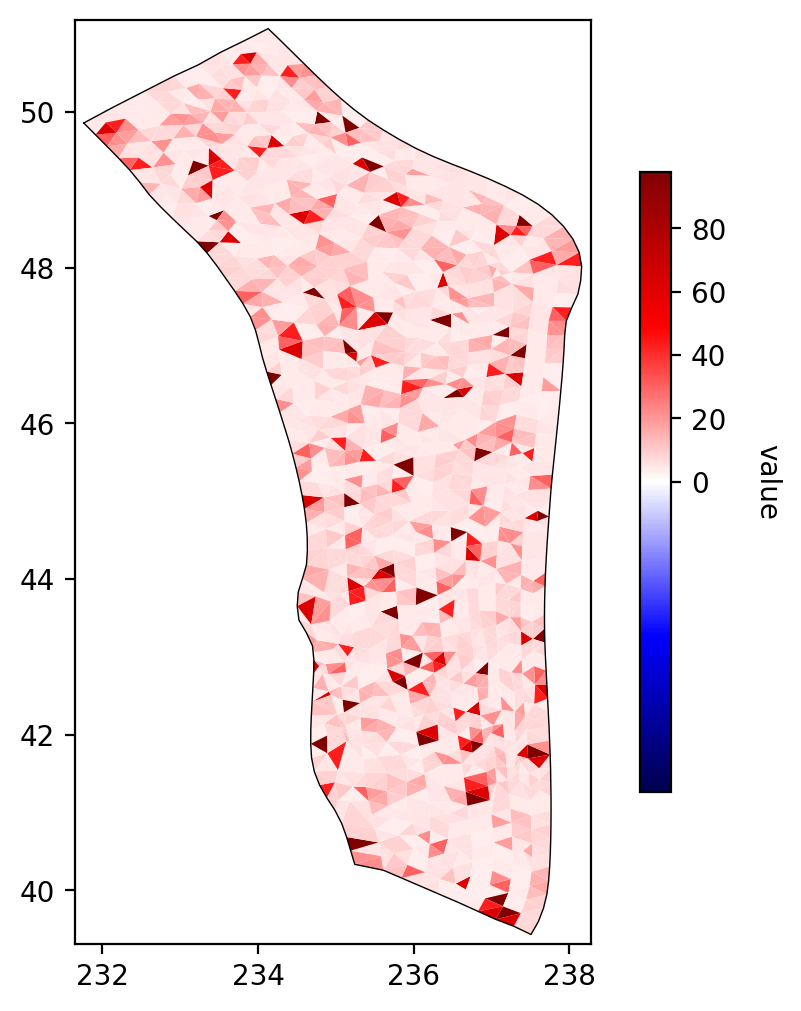

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
pc = plot_mesh(
    new_estimation.model.meshes[0],
    fill_value=new_trace.posterior[f"coupling_coefs_{mesh_idx}_ss"]
    .isel(chain=0)
    .std(dim="draw"),
    ax=ax,
    set_limits=True,
)

cbar = plt.colorbar(
    pc,
    ax=ax,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
plt.show()

### Plot the Eigenmodes

In [ ]:
kind = "strike_slip"
mesh_idx = 0
vmin = -0.1
vmax = 0.1

mesh = new_estimation.model.meshes[mesh_idx]
fig, axes = plt.subplots(2, 5, figsize=(12, 8))

from celeri.plot import plot_mesh

for ax, mode in zip(axes.flat, range(0, 10)):
    pc = plot_mesh(mesh, fill_value=mesh.eigenvectors[:, mode], ax=ax)

cbar = fig.colorbar(
    pc,
    ax=axes,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)

## Draws from prior

In [ ]:
center = 0
cmap = "seismic"
kind = "dip_slip"
mesh_idx = 0
mesh = new_estimation.model.meshes[mesh_idx]

np.random.seed(42)
coefs = np.random.normal(size=(mesh.eigenvectors.shape[1], 10))
coefs = coefs * 10
fig, axes = plt.subplots(2, 5, figsize=(12, 8))

for ax, mode in zip(axes.flat, range(0, 10)):
    field = mesh.eigenvectors @ coefs[:, mode]

    pc = plot_mesh(
        new_estimation.model.meshes[mesh_idx],
        fill_value=field,
        ax=ax,
        cmap=cmap,
        set_limits=True,
    )

cbar = fig.colorbar(
    pc,
    ax=ax,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle("Random Draws from Original Prior (Strike Slip)", fontsize=16);

In [ ]:
cmap = "seismic"
kind = "dip_slip"
mesh_idx = 0
mesh = new_estimation.model.meshes[mesh_idx]

np.random.seed(42)
coefs = np.random.normal(size=(mesh.eigenvectors.shape[1], 10))
coefs = coefs * 10 * np.sqrt(mesh.eigenvalues)[:, None]

fig, axes = plt.subplots(2, 5, figsize=(12, 8))

for ax, draw in zip(axes.flat, range(0, 10)):
    field = mesh.eigenvectors @ coefs[:, draw]

    pc = plot_mesh(
        new_estimation.model.meshes[mesh_idx],
        fill_value=field,
        ax=ax,
        cmap=cmap,
        set_limits=True,
    )

cbar = fig.colorbar(
    pc,
    ax=ax,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle("Random Draws from Matern 1/2 Prior", fontsize=16);

### Increasing the number of eigenmodes used with original approach 

In [12]:
from celeri.mesh import _get_eigenvalues_and_eigenvectors

eigenvalues, eigenvectors = _get_eigenvalues_and_eigenvectors(
    n_eigenvalues=1500,
    x=new_estimation.model.meshes[0].x_centroid,
    y=new_estimation.model.meshes[0].y_centroid,
    z=new_estimation.model.meshes[0].z_centroid,
)

Original

In [ ]:
mesh = new_estimation.model.meshes[0]
np.random.seed(42)
fig, axes = plt.subplots(2, 5, figsize=(12, 8))
n_eigs = [1, 5, 10, 25, 50, 100, 250, 500, 1000, 1500]

for ax, mode in zip(axes.flat, n_eigs):
    coefs = np.random.normal(size=mode)
    field = eigenvectors[:, :mode] @ coefs

    pc = plot_mesh(mesh, fill_value=field, ax=ax, set_limits=True)
    # Add a caption with the value of n_eigs for each subplot
    ax.set_title(f"n_eigs = {mode}", fontsize=10)

cbar = fig.colorbar(
    pc,
    ax=ax,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle("Uniformly-Weighted Eigenmode Prior", fontsize=16);

New

In [ ]:
mesh = new_estimation.model.meshes[0]
np.random.seed(42)
fig, axes = plt.subplots(2, 5, figsize=(12, 8))
n_eigs = [1, 5, 10, 25, 50, 100, 250, 500, 1000, 1500]

for ax, mode in zip(axes.flat, n_eigs):
    coefs = np.random.normal(size=mode)
    coefs = coefs * np.sqrt(eigenvalues[:mode])
    field = eigenvectors[:, :mode] @ coefs

    pc = plot_mesh(mesh, fill_value=field, ax=ax, set_limits=True)
    # Add a caption with the value of n_eigs for each subplot
    ax.set_title(f"n_eigs = {mode}", fontsize=10)

cbar = fig.colorbar(
    pc,
    ax=ax,
    orientation="vertical",
    fraction=0.025,
    pad=0.04,
)
cbar.set_label("value", rotation=270, labelpad=20)
fig.suptitle("Matern 1/2 Prior", fontsize=16);